# Spotify Top Artists and Song Audio Feature Analysis


### Importing in the function module and collecting the data
_in this phase we used the functions we created in the file spotify api functions, to read in, clean, and format the data._

In [494]:
#import the spotify_api_functions module and all necessary libraries
from spotify_api_functions import *
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#use the get_token_and_spotify function to authorize requests made to Spotify API
spotify_token = get_token_and_spotify(clientid,client_secret)

#next use the imported functions to create the following Dictionaries/lists:
#female_artists (artist names and their urls)
female_artists = get_artist_from_playlist(spotify_token, playlist_uri)

#artists_attributes: name, popularity, follower count, genres
artists_attributes = get_artists_attributes(spotify_token,female_artists)

#top_songs: top 10 songs from each of the top artists
top_songs = get_artist_top_songs(spotify_token, female_artists)

#song_features: song name, artist, and audio features (i.e. dancability, energy, tempo)
song_features = get_song_features_artists(spotify_token,top_songs)

In [ ]:
#unnesting the song_features dictionary into a pandas DF
#reset the index and drop the old index column
song_features_df = pd.concat(pd.DataFrame(l) for l in song_features)
song_features_df.reset_index(inplace = True)
song_features_df = song_features_df.drop(['index'],axis=1)

In [ ]:
#the columns are non-numeric, so use apply to broadcast pd.to_numeric to 
#the correct columns/cells (all audio feature columns)
#then ensure it the columns are the correct datatype

column_names = ['acousticness', 'danceability','duration_ms',
                  'energy','instrumentalness','key','liveness',
                  'loudness','mode','speechiness','tempo',
                  'time_signature','valence']

song_features_df[column_names] = song_features_df[column_names].apply(pd.to_numeric)

song_features_df.info()

In [222]:
#check the dataframe
song_features_df.head()

In [ ]:
#save the song features df as a csv file
song_features_df.to_csv('female_artists_song_features.csv')

In [234]:
#make female_artists and artists_attributes into DFs
female_artists_uri = pd.DataFrame(female_artists)
female_artists_attributes = pd.DataFrame(artists_attributes)

#save artists attributes df to a csv file
female_artists_attributes.to_csv('female_artists_Attributes.csv')

In [327]:
#song_features_df.columns
#column names that have numerical values
# features_to_plot = ['acousticness', 'danceability', 'duration_ms', 'energy',
#                     'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
#                     'speechiness', 'tempo', 'time_signature', 'valence']

In [350]:
#first we plotted a few regresson plots and then decided to do them all at once
#use the function create_subplots_songFeatures() to plot these for the data frame
#create a list of the columns we want to run against song popularity

#ax = sns.regplot(x="song_popularity", y="acousticness", data=song_features_df)
# ax = sns.regplot(x="song_popularity", y="danceability", data=song_features_df)

features_to_plot = ['acousticness', 'danceability', 'duration_ms', 'energy',
                    'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
                    'speechiness', 'tempo', 'time_signature', 'valence']

#pass the df, the columns, and the final name of the png file
female_subplots = create_subplots_songFeatures(song_features_df,features_to_plot,'female_song_features_correlation.png')

    

,acousticness,artist_name,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_names,song_popularity,speechiness,tempo,time_signature,valence
0,0.60100,Ariana Grande,0.771,178627,0.320,0.000000,1,0.0885,-10.752,0,7 rings,84,0.3160,139.844,4,0.312
1,0.24000,Ariana Grande,0.735,207320,0.638,0.000000,1,0.1020,-5.605,1,"thank u, next",82,0.0785,107.016,4,0.402
2,0.03780,Ariana Grande,0.726,190440,0.545,0.000000,5,0.1080,-5.489,0,"break up with your girlfriend, i'm bored",90,0.1020,169.991,4,0.348
3,0.04000,Ariana Grande,0.699,205920,0.713,0.000003,9,0.2940,-5.507,0,no tears left to cry,88,0.0594,121.993,4,0.354
4,0.36400,Ariana Grande,0.709,212267,0.474,0.000000,8,0.1200,-4.890,1,imagine,82,0.0423,125.107,3,0.366
5,0.02110,Ariana Grande,0.568,198160,0.656,0.000014,8,0.2130,-5.413,1,breathin,87,0.0433,100.049,4,0.364
6,0.78700,Ariana Grande,0.607,171573,0.314,0.000003,7,0.2010,-8.026,0,needy,86,0.0372,86.990,4,0.169
7,0.02330,Ariana Grande,0.602,197547,0.658,0.000060,1,0.2370,-5.934,1,God is a woman,86,0.0558,145.031,4,0.268
8,0.07380,Ariana Grande,0.765,216893,0.663,0.000099,2,0.2060,-5.185,0,bloodline,86,0.0886,151.979,4,0.633
9,0.45300,Ariana Grande,0.597,182000,0.458,0.000000,6,0.2530,-6.909,1,NASA,59,0.2960,74.972,4,0.542


### Start to Visualize and analyize the data 

_checking at first the correlation between all of the variables, with special attenion going to their correlation to song popularity_

_it's seems like a good idea to see if the data is within the IQR (interquartile range), to check for outliers. So, we decided to create box plots for the song features to see if the data could be skewed_

<Figure size 432x288 with 0 Axes>

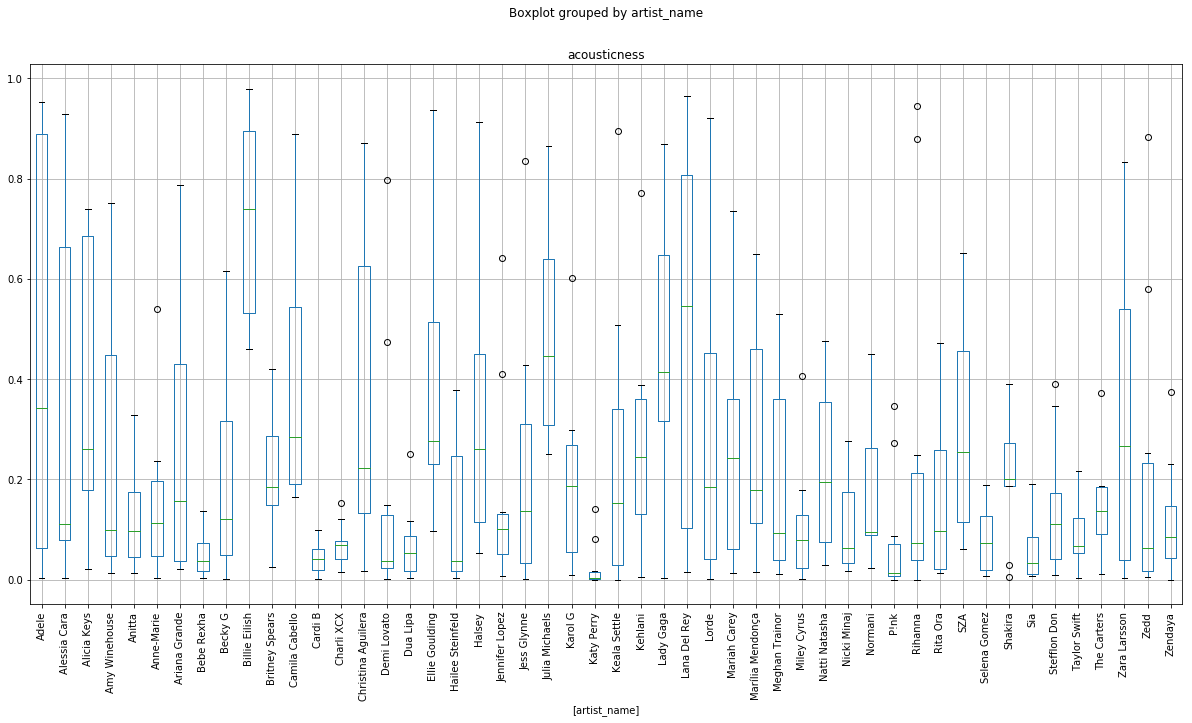

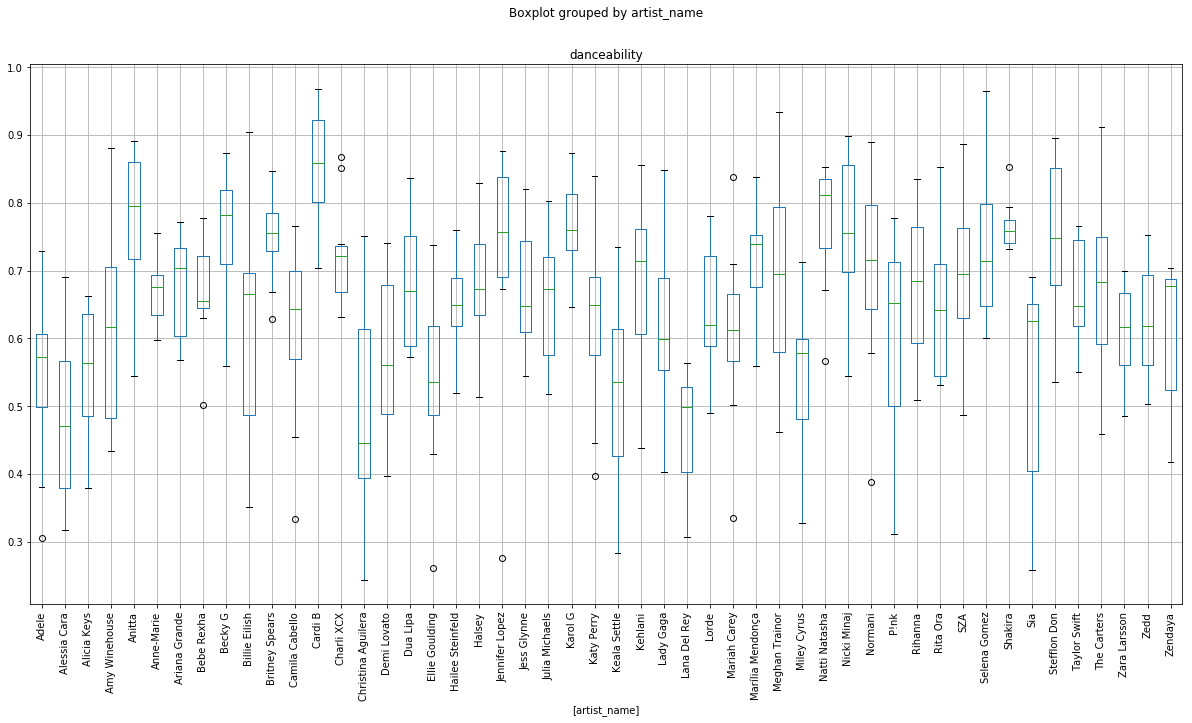

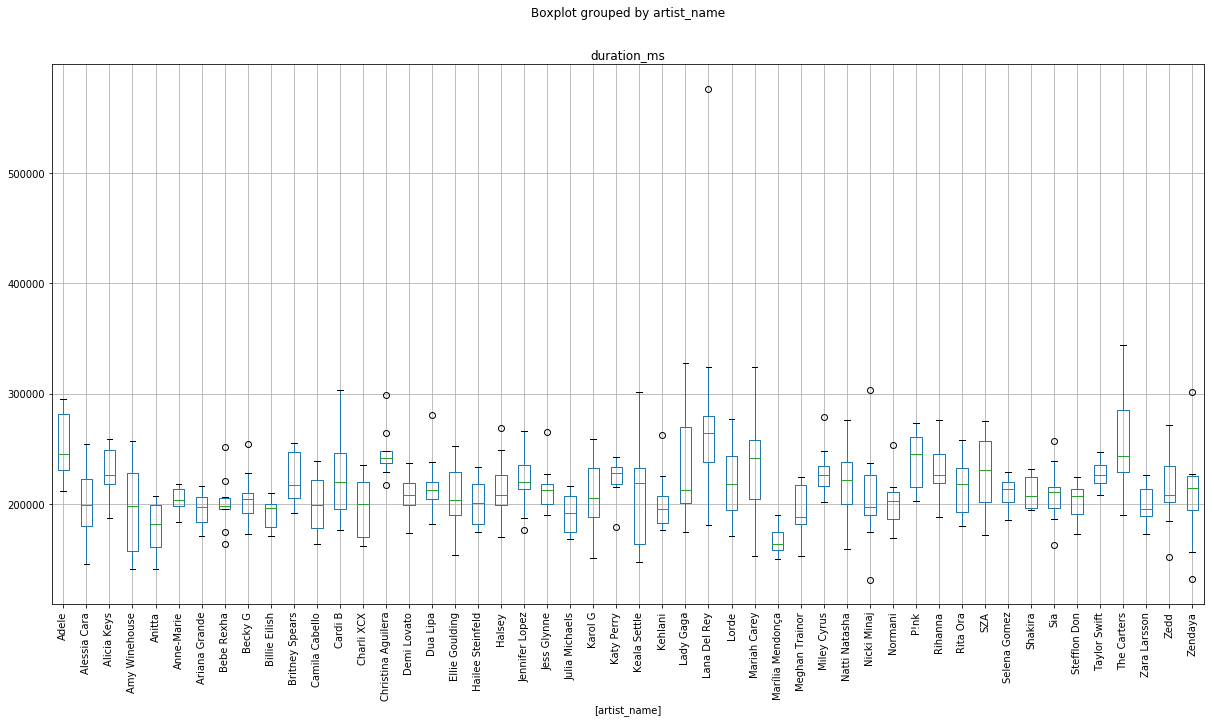

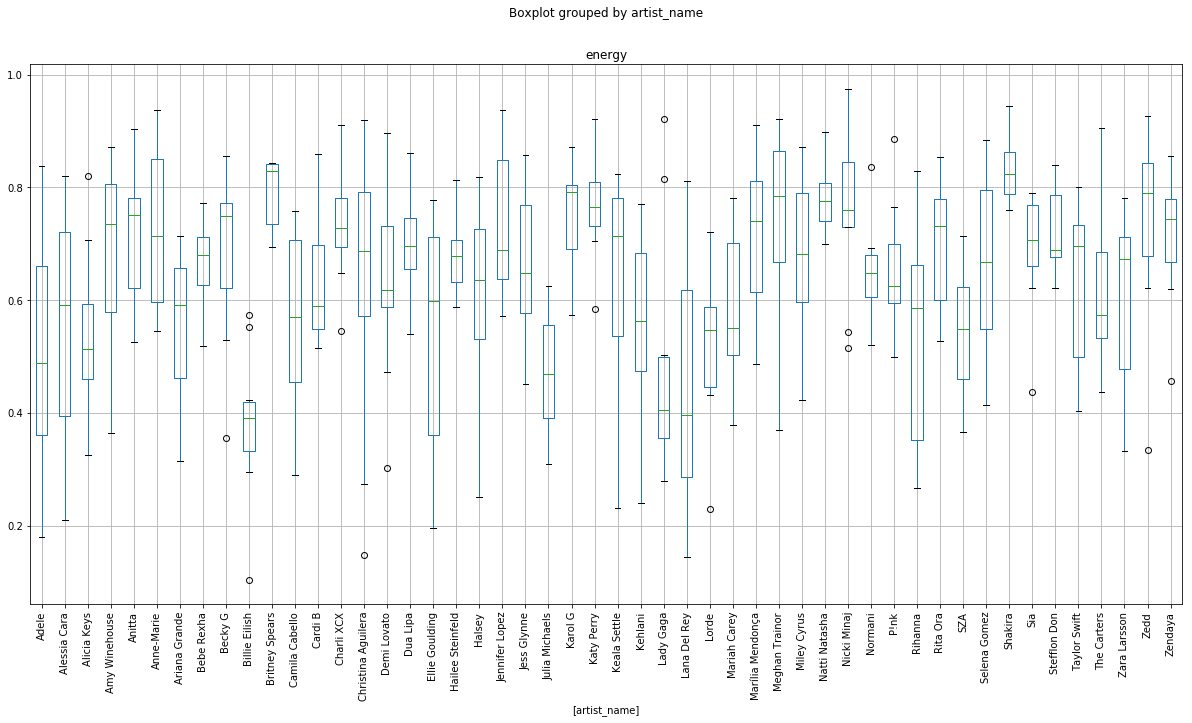

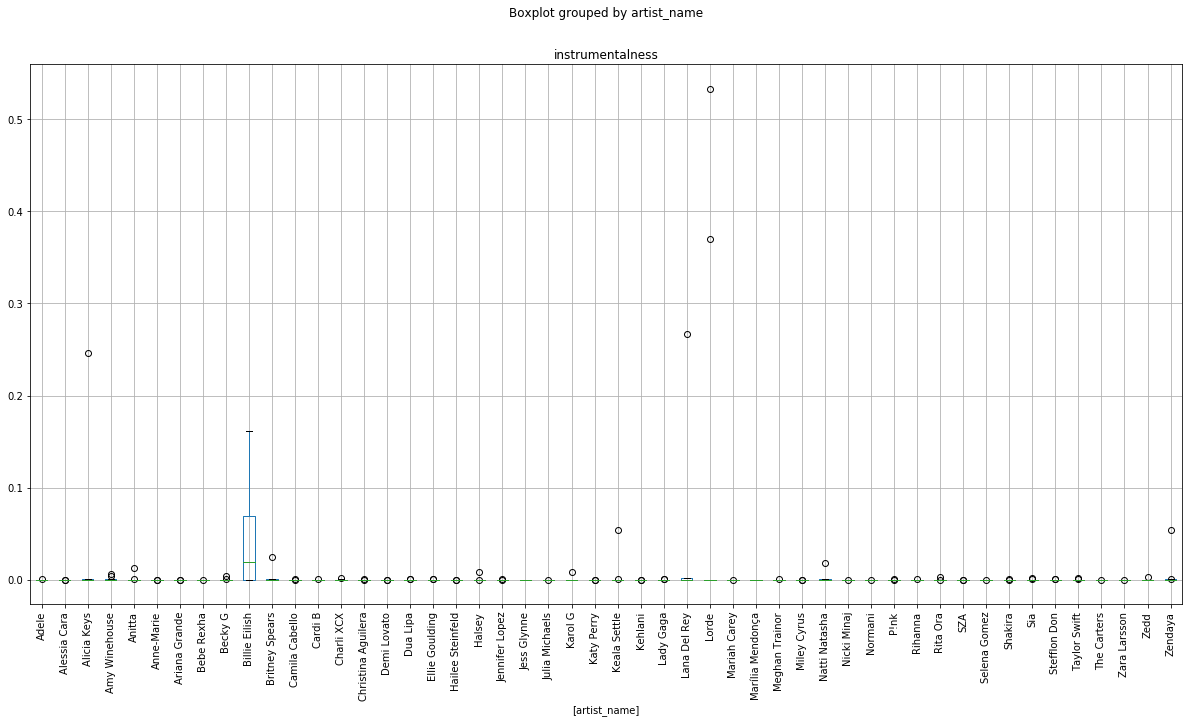

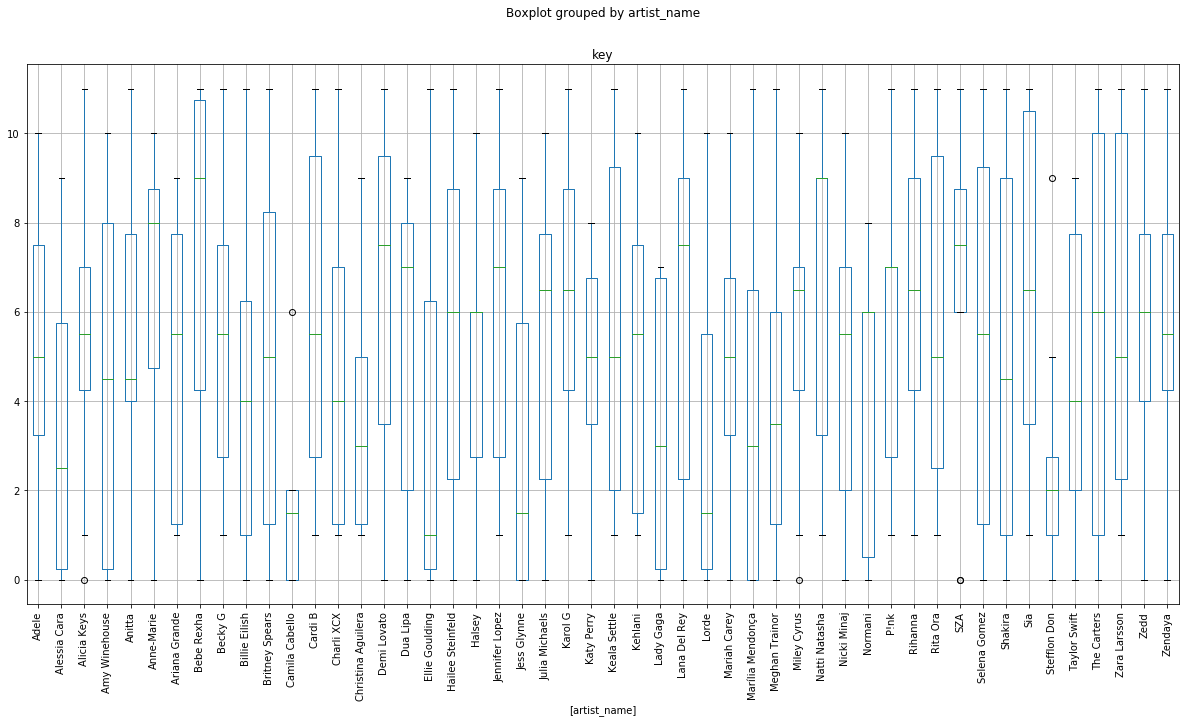

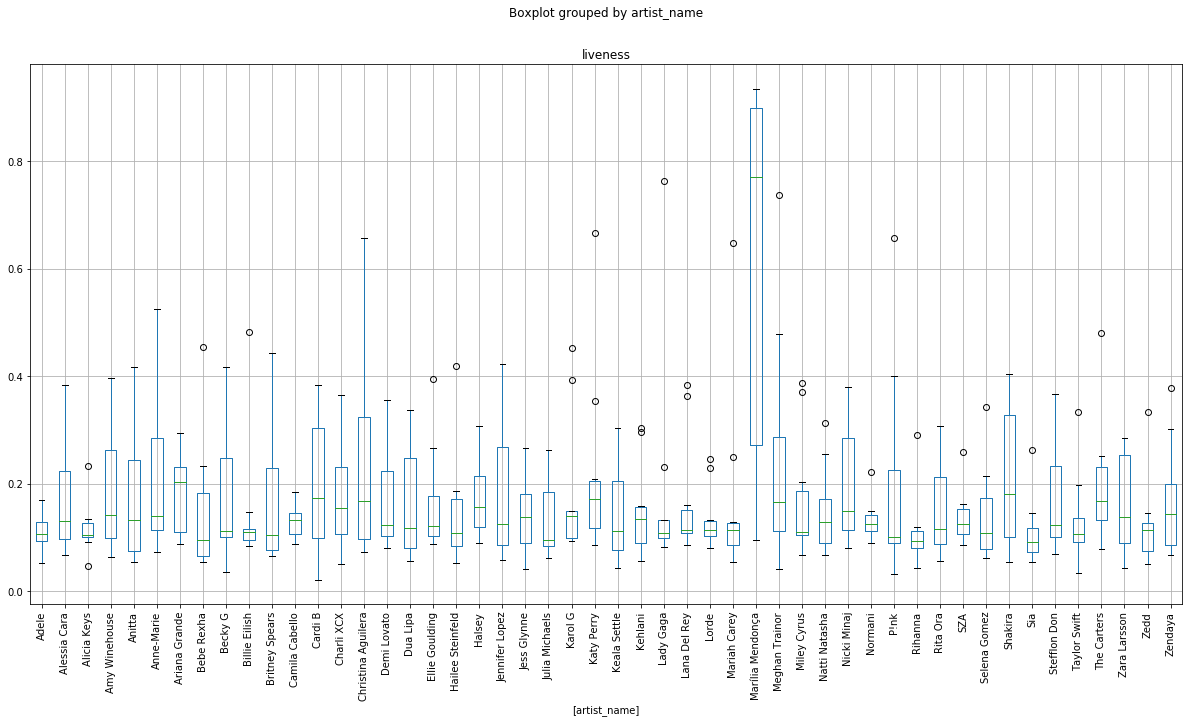

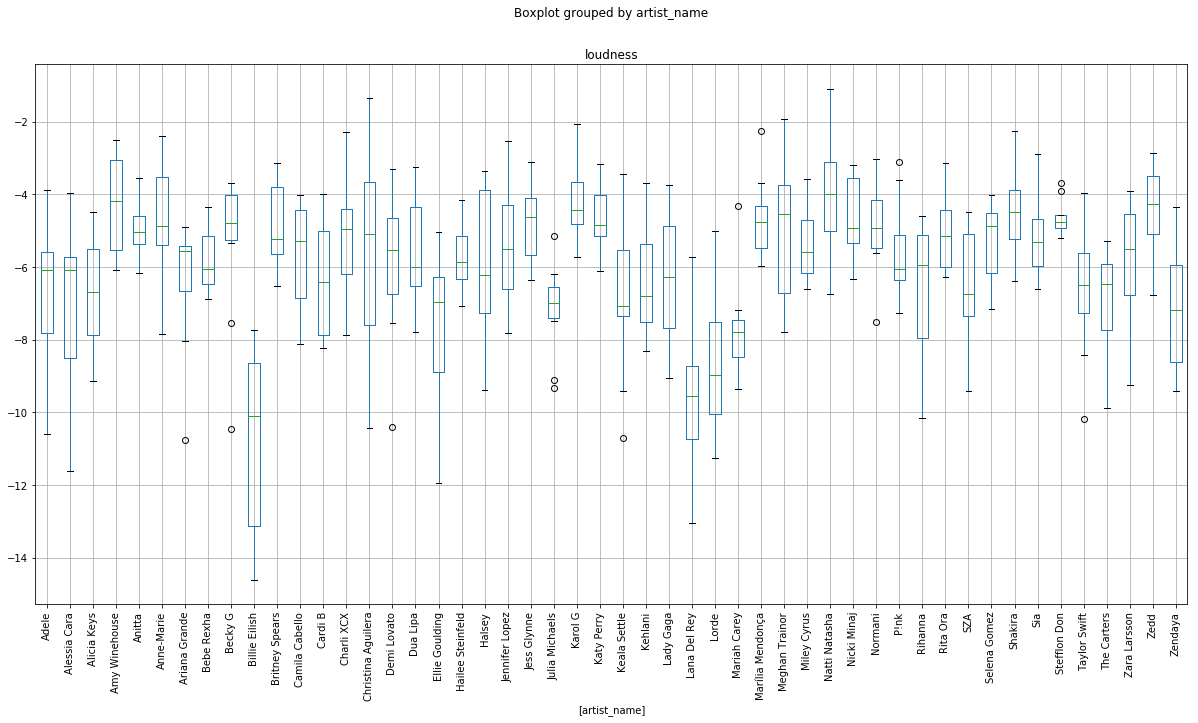

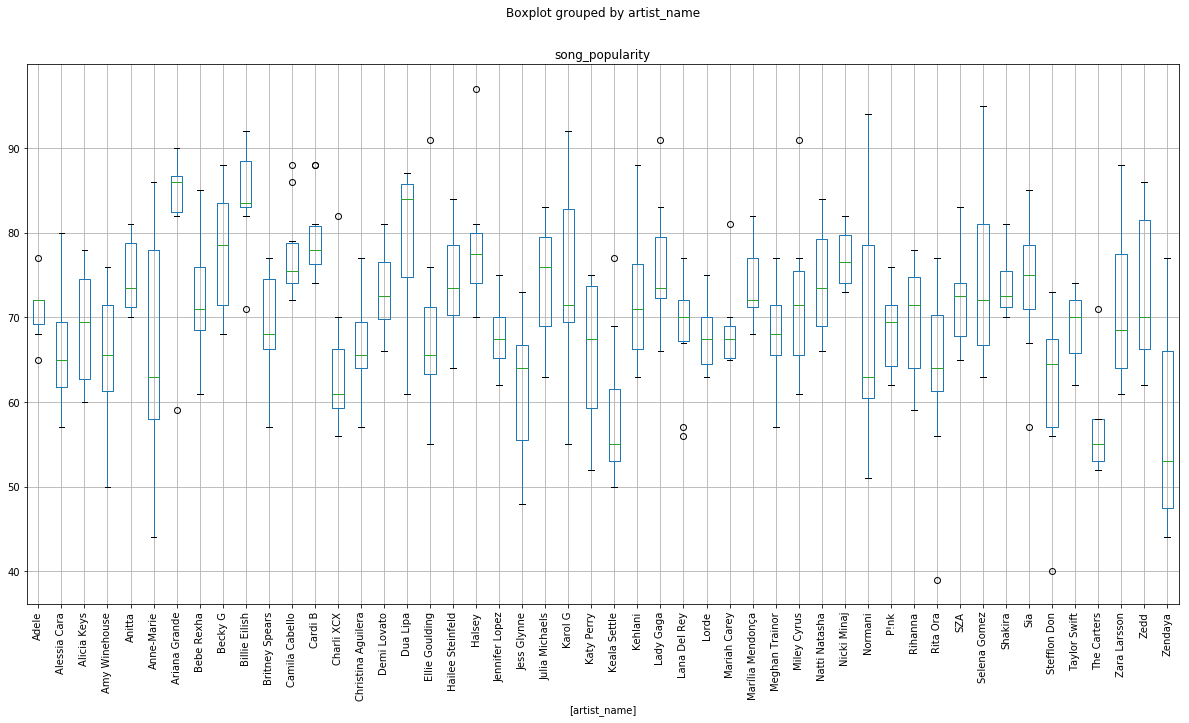

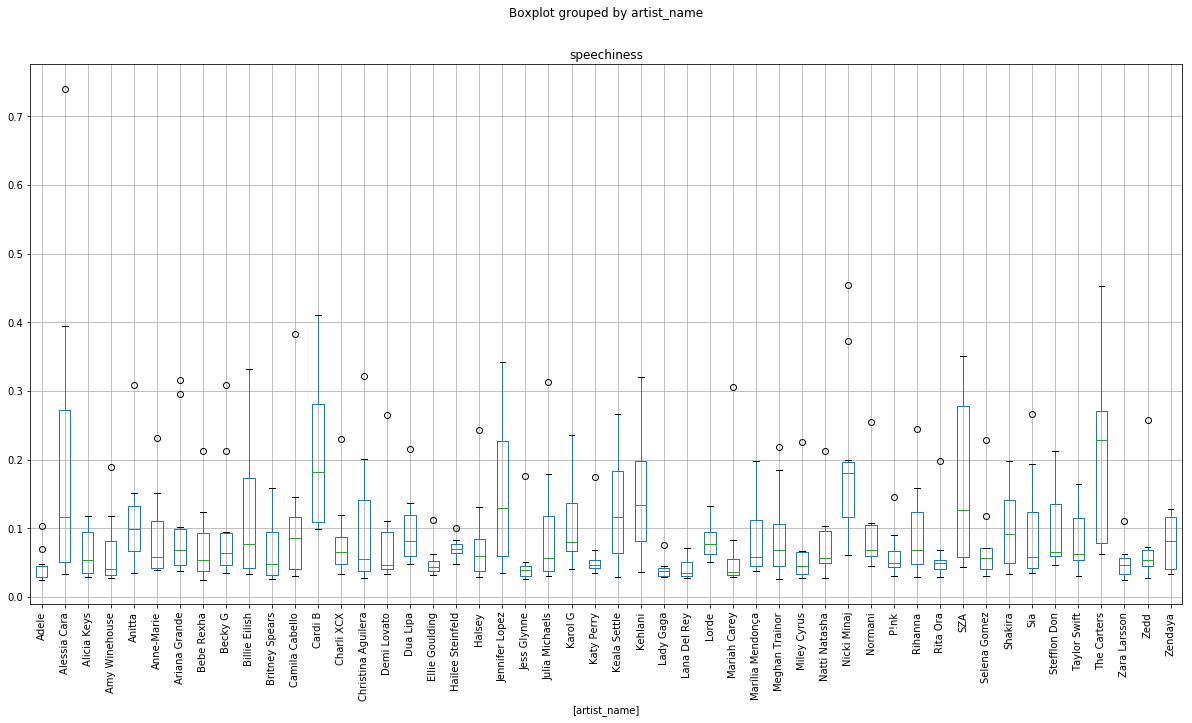

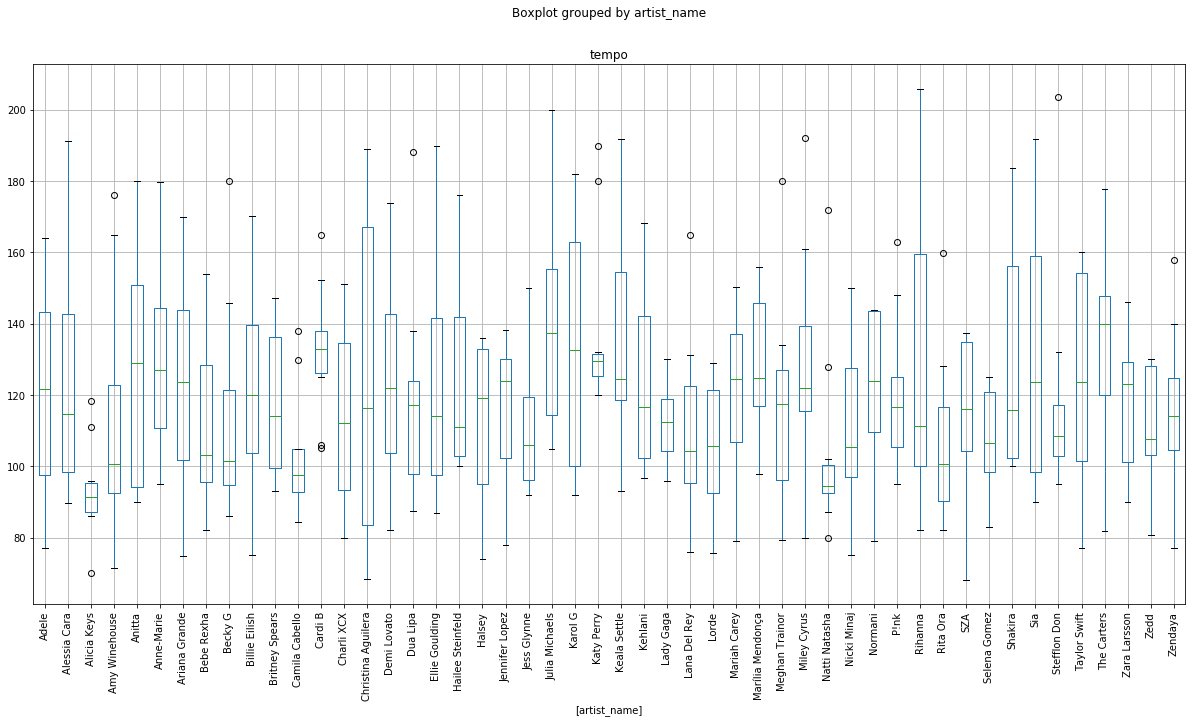

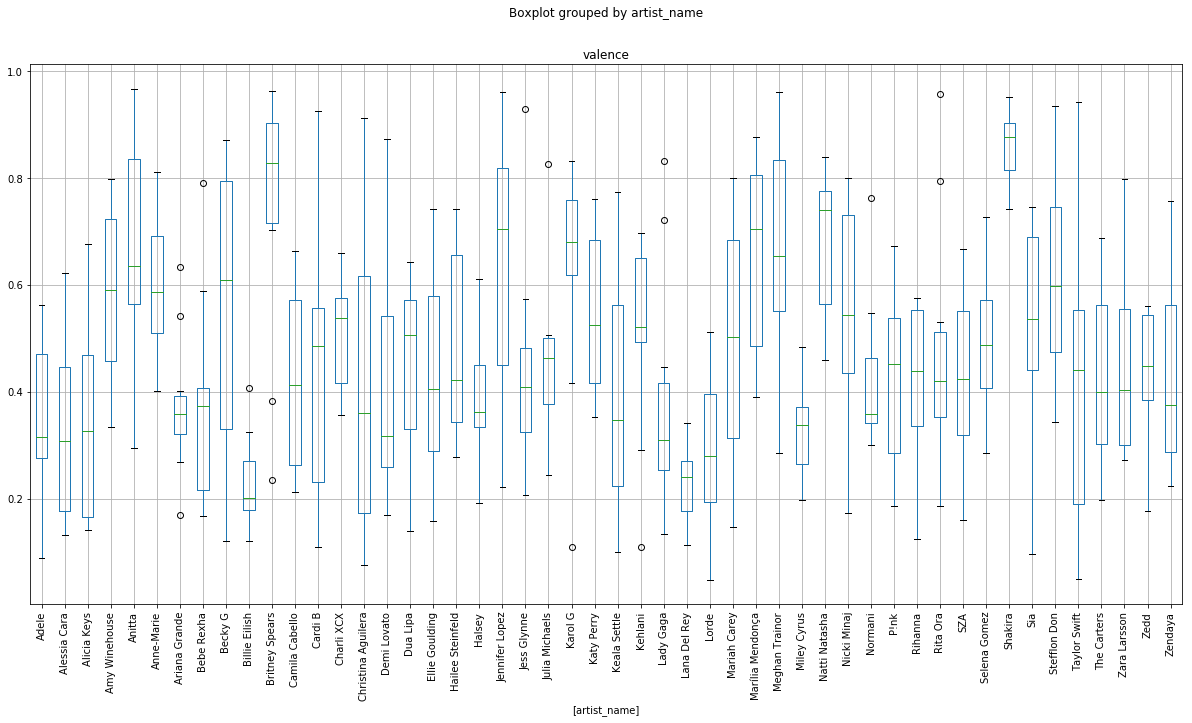

In [402]:
#use the function create_subplots_boxplots() we imported to create box plot charts
#each figure will be for one attribute with a box for each artist to look for the presence
#of outliers

# def create_subplots_boxplots(df,column_names):   
#     '''
#     Function to create sub-distplots from a given DataFrame and specified 
#     columns. You pass the DataFrame, the list of column names, and the name
#     of the png file it will be saved as.
#     '''
#     fig = plt.figure()
#     fig.subplots_adjust(hspace=0.4, wspace=0.2)
#     col_len = len(column_names)
#     for i in column_names:
#         #ax = fig.add_subplot(col_len, 1, column_names.index(i)+1)
#         song_features_df[[i,'artist_name']].boxplot(by='artist_name', figsize=(20,10))
#         plt.xticks(rotation=90)
#         #fig.subplots_adjust(hspace=0.2)
#     #fig.savefig(png_name)
#     plt.show()


col_names_box = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness',
       'song_popularity', 'speechiness', 'tempo', 'valence']

create_subplots_boxplots(song_features_df,col_names_box) #we exculded some columns such as key

/Users/elenasm7/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


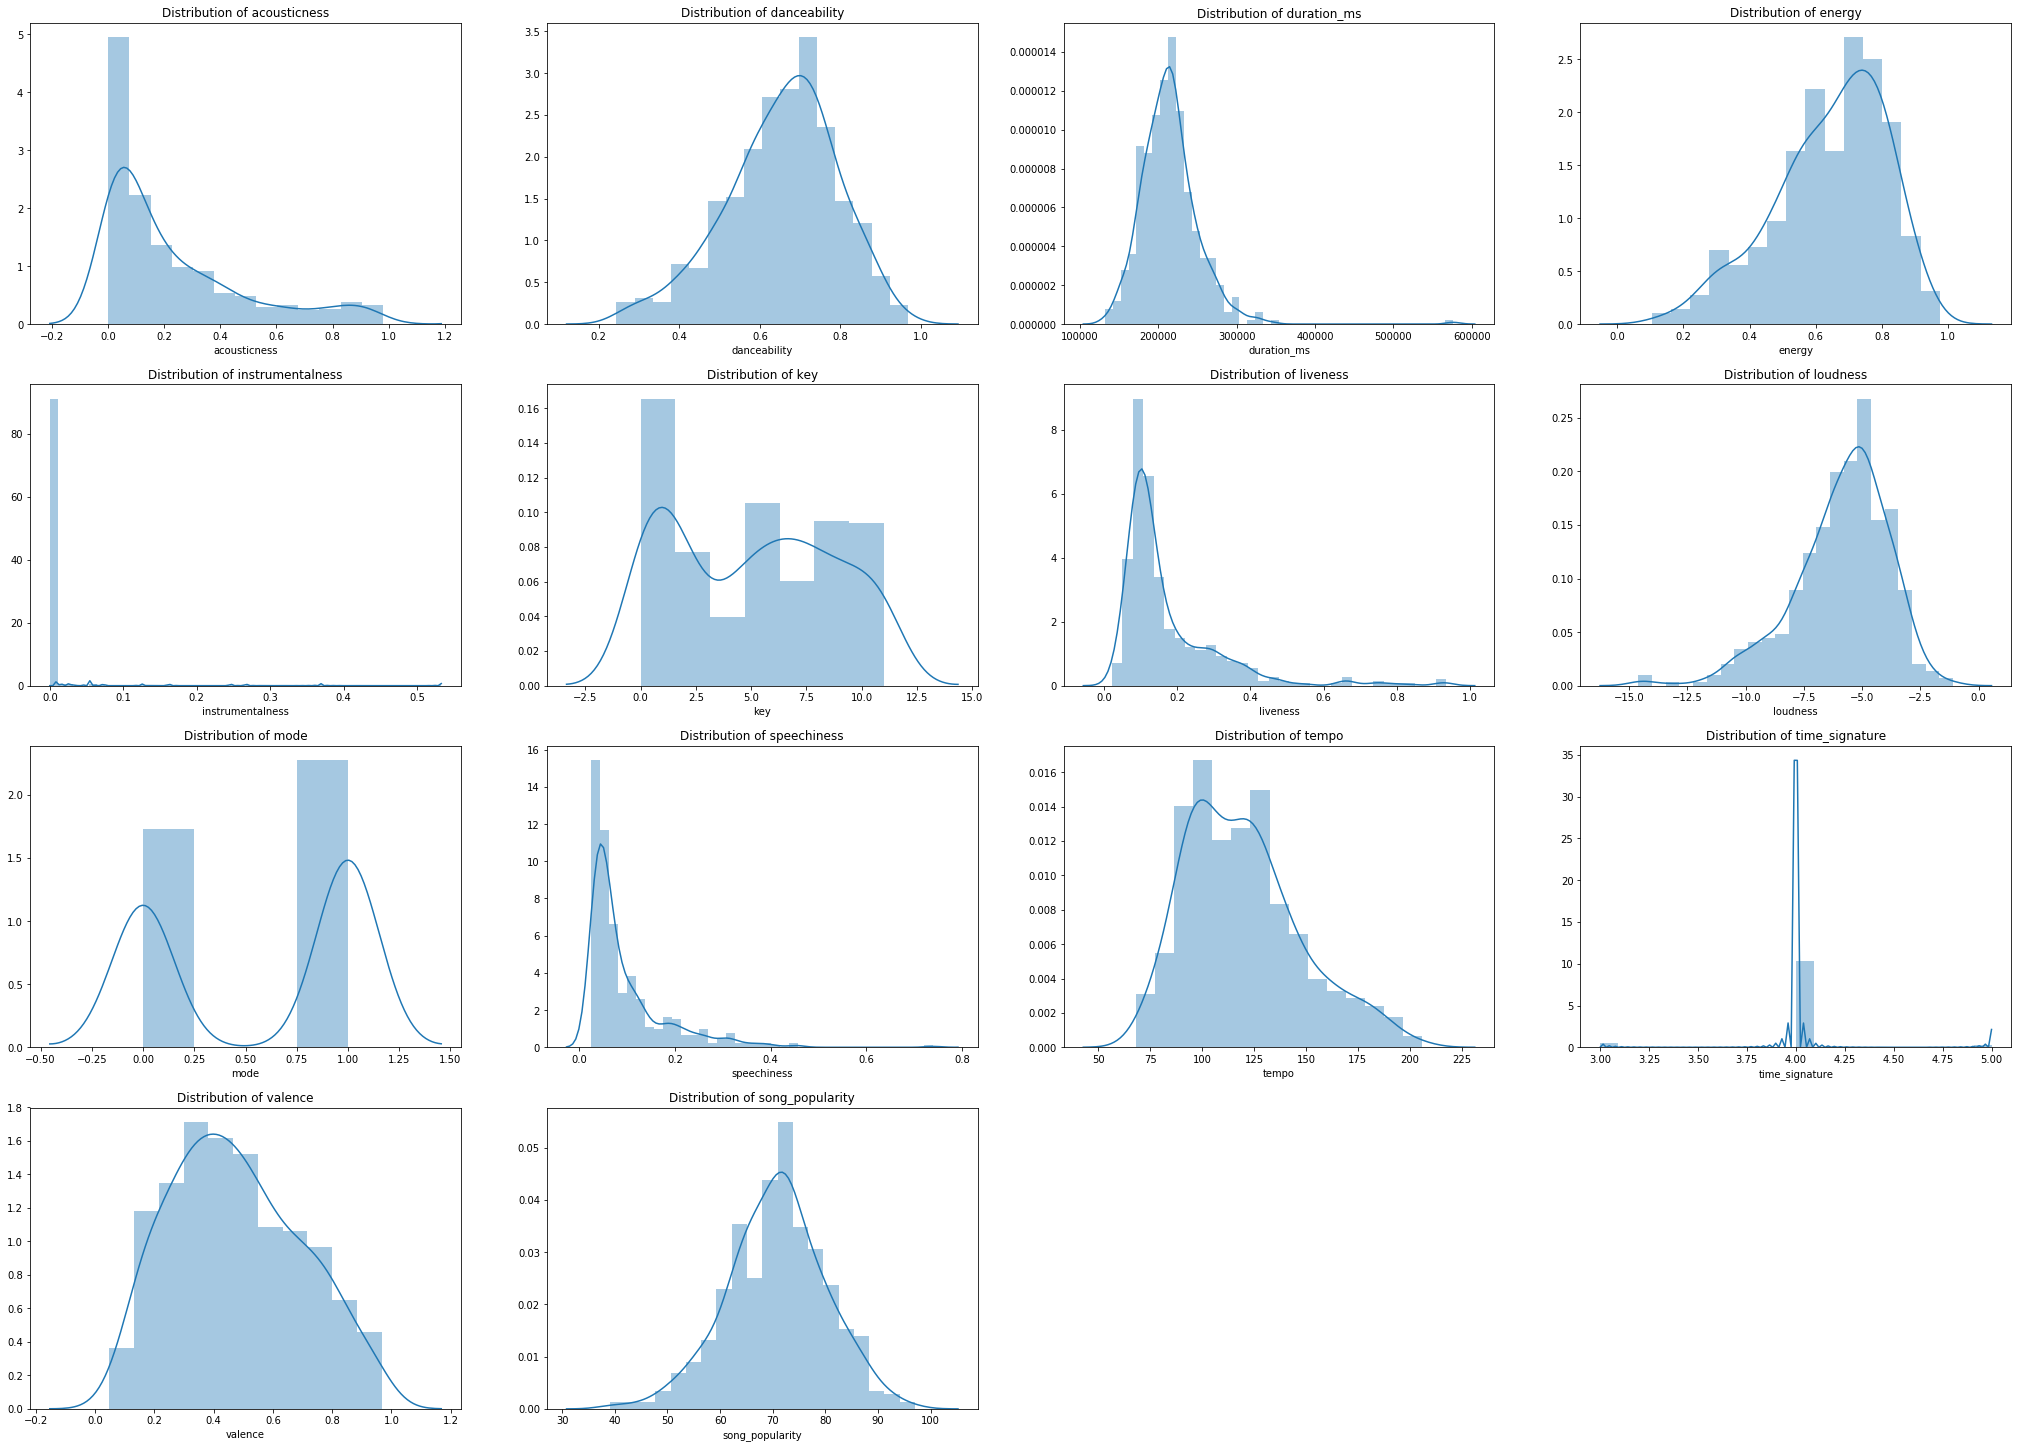

In [391]:
# def create_subplots_distplot(df,column_names,png_name):   
#     fig = plt.figure()
#     fig.subplots_adjust(hspace=0.4, wspace=0.2)
#     col_len = len(column_names)
#     nrows = (col_len//4)+1
#     for i in column_names:
#         ax = fig.add_subplot(nrows, 4, column_names.index(i)+1)
#         #plt.figure(figsize=(10,3))
#         #ax.text(0.5, 0.5, str((4, 3, i)), fontsize=18, ha='center')
#         sns.distplot(df[i]).set_title(f'Distribution of {i}')
#         fig.set_size_inches(35.5, 25.5)
#         fig.subplots_adjust(hspace=0.2)
#     fig.savefig(png_name)
#     plt.show()
#
#We will now create all of the distribution plots for the song attributes to 
#get a better understanding of the data. We will use the create_subplots_distplot()
#funtion and pass the df, column names and the png file name

column_names_corr = ['acousticness', 'danceability', 'duration_ms',
                  'energy','instrumentalness','key','liveness',
                  'loudness','mode','speechiness','tempo',
                  'time_signature','valence','song_popularity']
create_subplots_distplot(song_features_df,column_names_corr,'Distributions_of_Audio_Features.png')

_here we can see that there isn't really much correlation to the popularity of the song to any audio features. Dancability and accousticness seem to have the most positive relationship, but barely._

_lets use stats from scipy to get a better idea_

In [ ]:
#looked into the slope, intercept, r_value, p_vaue, and standard error to see how good
#stong the correlation is

# slope, intercept, r_value, p_value, std_err = stats.linregress(x=song_features_df["song_popularity"], y=song_features_df["danceability"])
# slope, intercept, r_value, p_value, std_err

_lets look at the summary statistics below to get a better feeling for the spread of the data_

In [ ]:
#run the function .corr() to see the correlation between each column
song_features_df.corr()

In [ ]:
#next created a heatmap to be able to see the relationship between these easier
#passed a list of the columns we want, then plot and save the file

column_names_corr = ['acousticness', 'danceability', 'duration_ms',
                  'energy','instrumentalness','key','liveness',
                  'loudness','mode','speechiness','tempo',
                  'time_signature','valence','song_popularity']
song_features_heatmap = plt.figure(figsize = (25,7))
ax = sns.heatmap(song_features_df[column_names_corr].corr(), cmap="RdBu_r", annot=True).set_title('Correlation Between Female Song Audio Features')
song_features_heatmap.savefig('female_song_features_heatmap.png')

_Since there doesn't seem to be too much of a connection between the audio features and song populatity, we decided to take the mean values of these features and take a look._ 

In [ ]:
# #list_of_names = top_songs['artist_name'].values

# def mean_of_artist_columns_to_df(artists,song_df): 
#     values = []
#     for i in artists:
#         the_mean = song_df[song_df['artist_name'] == i].mean()
#         values.append(np.append(i, the_mean.values))
#     column_name = np.append('artist_name', the_mean.index)
#     return pd.DataFrame(values, columns=column_name)

In [133]:
#we created a list of the artist names, and then used the function mean_of_artist_columns_to_df
#once we had the new df, we converted the correct columns to numeric values

list_of_names = female_artists_attributes['name'].values
mean_song_attri = mean_of_artist_columns_to_df(list_of_names,song_features_df)
mean_song_attri.to_csv('female_mean_song_attributes.csv')
col_names = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_popularity', 'speechiness', 'tempo', 'time_signature', 'valence']
mean_song_attri[col_names] = mean_song_attri[col_names].apply(pd.to_numeric)

_now that we have this new DataFrame of Artists Attributes with their mean song features, we can look fro correlation at this level_

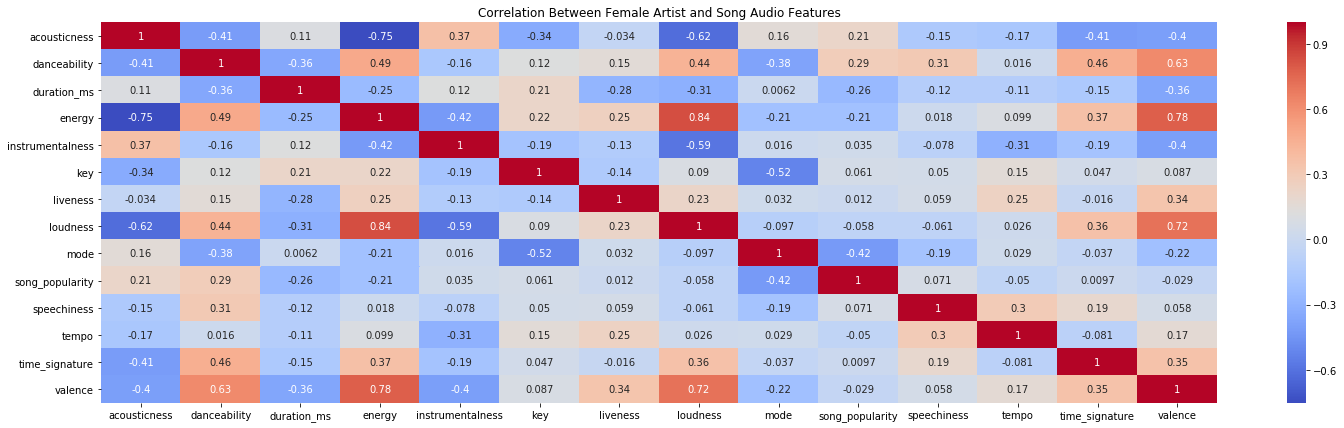

In [375]:
#plot a heatmap for the mean dataframe we just created.
plt.figure(figsize = (25,7))
sns.heatmap(mean_song_attri.corr(), cmap="coolwarm", annot=True).set_title('Correlation Between Female Artist and Mean Song Audio Features')
plt.show()

# edit this one
At this level, there does seem to be slighly more correlation between dancability,

_Now, that we have the data like this it may be easier to check if these average song audio features have an impact on the artists overall popularity_

In [144]:
#create a smaller df of the artist attributes to append to the mean one
#append these two on the columns axis (1), and join it on either index (they should be the same)

short_female_attributes = female_artists_attributes[['artist_popularity','followers','genres','name']]
female_song_artist_attri = pd.concat([mean_song_attri, short_female_attributes], axis=1, join_axes=[short_female_attributes.index])

In [135]:
#check to make sure the names in the two name columns align 
female_song_artist_attri['name'] == female_song_artist_attri['artist_name']

In [147]:
#since we know that they do, drop the 'name' column
female_song_artist_attri = female_song_artist_attri.drop(['name'],axis=1)

In [150]:
#again, we need to ensure that the columns are numeric, specify the columns 
#and apply to_numeric() method

col_names_3 = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_popularity', 'speechiness', 'tempo', 'time_signature', 'valence',
       'artist_popularity', 'followers']
female_song_artist_attri[col_names_3] = female_song_artist_attri[col_names_3].apply(pd.to_numeric)

_now that we have this new DataFrame of Artists Attributes with their mean song features, we can look fro correlation at this level. let's create a heatmap to see if there is anything new_

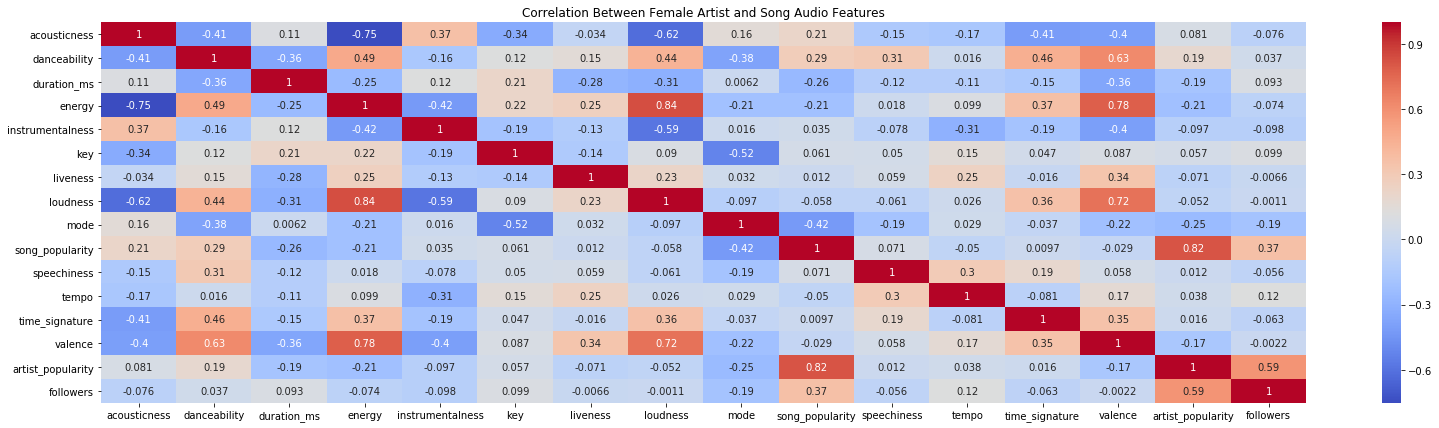

In [379]:
#create a heatmap of the data frame we just created with the .corr() method called on it

female_avg_song_artist_features_heatmap = plt.figure(figsize = (27,7))
sns.heatmap(female_song_artist_attri.corr(), cmap="coolwarm", annot=True).set_title('Correlation Between Female Artist and Song Audio Features')
female_avg_song_artist_features_heatmap.savefig('female_avg_song_artist_features_heatmap.png')
plt.show()

### Conclusions

__the biggest correlation in this data was between artist popularity and song popularity__,
and that seems intuivitively correct. Many songs can share very simialr song features, but the one by a popular artist will be the one will the most success. 

Becuase the popular artists has more followers, and most likely more press coverage, the song is easily avaible to a wider audience. It makes perfect sense that Ariana Grade is our top artists and her songs are being played the most--a good portion of the popularity of the song may be due to hype alone and not instrinsic _goodness_

### more data to explore
_lets look into genres and words in song titles_

In [509]:
# def count_title_words_x_y(song_features_df):
#     title_words = []
#     for artist in song_features_df['song_names']:
#         for title in artist:
#             genres.append(title.split())
#     genre_counts = [[x,genres.count(x)] for x in set(genres)]
#     return [*zip(*genre_counts)] #this returns two lists



#     genres = []
#     for artist in artists_attributes_df['genres']:
#         for item in artist:
#             genres.append(item)
#     genre_counts = [[x,genres.count(x)] for x in set(genres)]
#     return [*zip(*genre_counts)] #this returns two lists
# # song_features_df['song_names']
def title_word_counts(song_features):
    title_words_list = []
    for title in song_features['song_names']:
        title = title.split('(', 1)[0]
        title_words_list.append(title.replace('&','and').split('-', 1)[0].split())
    title_words_list = [word for title_list in title_words_list for word in title_list]
    word_counts = [[x,title_words_list.count(x)] for x in set(title_words_list)]
    title_words, counts = [*zip(*word_counts)]
    return list(title_words), list(counts)
    
words, counts = title_word_counts(song_features_df)

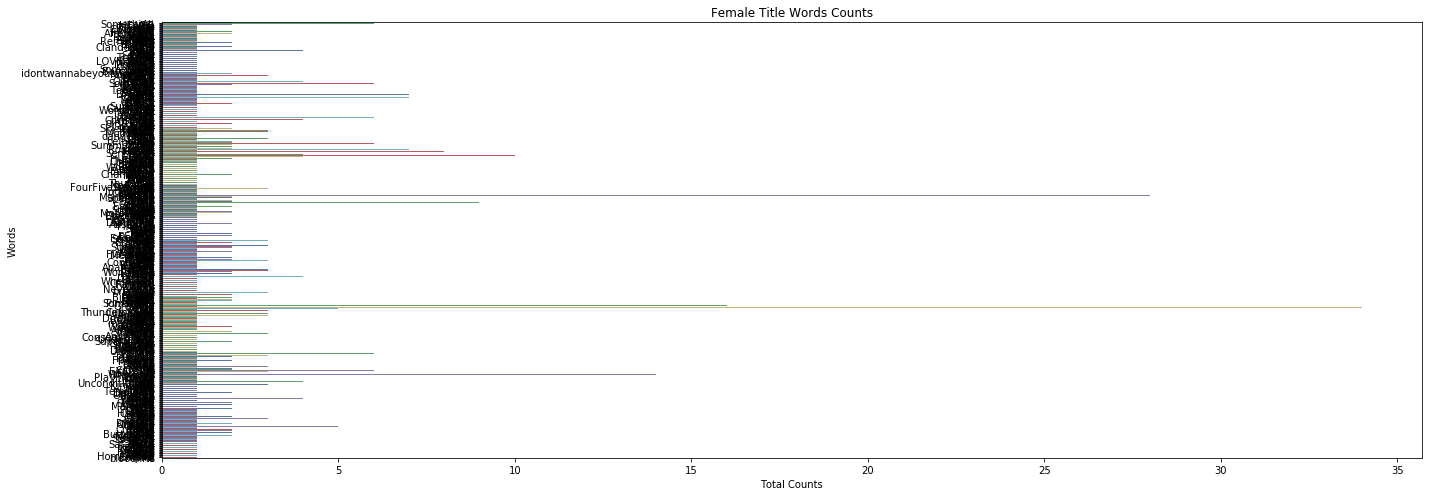

In [512]:
word_counts_fig = plt.figure(figsize = (20,7))
plt.title('Female Title Words Counts')
plt.ylabel('Words')
plt.xlabel('Total Counts')
ax = sns.barplot(x=counts, y=words,palette="deep") 
plt.tight_layout()


In [491]:
title_words

[['7', 'rings'],
 ['thank', 'u,', 'next'],
 ['break', 'up', 'with', 'your', 'girlfriend,', "i'm", 'bored'],
 ['no', 'tears', 'left', 'to', 'cry'],
 ['imagine'],
 ['breathin'],
 ['needy'],
 ['God', 'is', 'a', 'woman'],
 ['bloodline'],
 ['NASA'],
 ['One', 'Kiss'],
 ['Kiss', 'and', 'Make', 'Up'],
 ['Electricity'],
 ['IDGAF'],
 ['New', 'Rules'],
 ['Swan', 'Song'],
 ['Scared', 'to', 'Be', 'Lonely'],
 ['Want', 'To'],
 ['One', 'Kiss'],
 ['Be', 'The', 'One'],
 ['I', 'Like', 'It'],
 ['Money'],
 ['Finesse'],
 ['MotorSport'],
 ['Bodak', 'Yellow'],
 ["Backin'", 'It', 'Up'],
 ['Ring'],
 ['Be', 'Careful'],
 ['Bartier', 'Cardi'],
 ['Drip'],
 ['Delicate'],
 ['I', 'Don’t', 'Wanna', 'Live', 'Forever'],
 ['Shake', 'It', 'Off'],
 ['Blank', 'Space'],
 ['Look', 'What', 'You', 'Made', 'Me', 'Do'],
 ['I', 'Knew', 'You', 'Were', 'Trouble.'],
 ['End', 'Game'],
 ['...Ready', 'For', 'It?'],
 ['Love', 'Story'],
 ['Wildest', 'Dreams'],
 ['Beautiful'],
 ['Havana'],
 ['Never', 'Be', 'the', 'Same'],
 ['Consequences'],

In [474]:
title_words

[]

In [496]:
#get the attributes with the genres and artists in each row, so we can get the corr between those
#break them all up and create a count of them, make a bar chart
# female_genres = []
# for artist in female_artists_attributes['genres']:
#     for item in artist:
#         female_genres.append(item)

female_genre, female_counts = count_genre_x_y(female_artists_attributes)

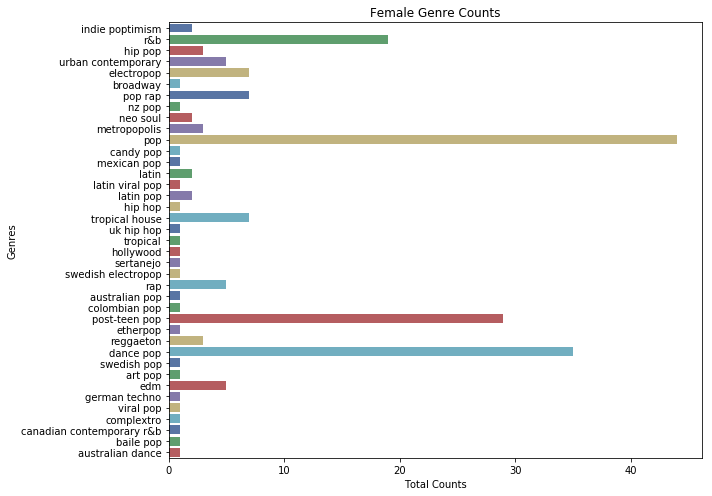

In [497]:
fig = plt.figure(figsize = (10,7))
plt.title('Female Genre Counts')
plt.ylabel('Genres')
plt.xlabel('Total Counts')
ax = sns.barplot(x=female_counts, y=female_genre,palette="deep") 
plt.tight_layout()
fig.savefig('female_genre_counts.png')

_here it is pretty obvious that the largest genre's that make up the female category are pop: pop, post-teen pop (aka Ariana Grande), and dance pop (also ari)._

In [ ]:
#here we created a dataframe of the upper and lower quartiles for each column
#of song_features_df

iqr_song_features = song_features_df.quantile([0.25,0.75])

In [272]:
#this is a function that should go through the df, and return the value of the cell
#if it is not an outlier, and return NaN if it is an outlier

def is_in_iqr(iqr,data):
    n_data = data
    for i in iqr:
        count = 1
        while count < len(n_data[i]):
            iqr_num = (iqr[i].values[1] - iqr[i].values[0])*1.5
            mean = n_data[i].mean()
            upper, lower = mean+iqr_num, mean-iqr_num
            n_data[i] = n_data[i].apply(lambda x: x if (x >= lower) and (x <= upper) else np.NaN)
            count += 1
    return n_data

In [298]:
from scipy.stats import normaltest
data = song_features_df['danceability']
stat, p = normaltest(data)
print(stat, p)

16.064054747392813 0.00032488886963416043


In [299]:
from scipy.stats import pearsonr
data1, data2 = song_features_df['danceability'],song_features_df['song_popularity']
corr, p = pearsonr(data1, data2)
print(corr, p)

0.1493107351473812 0.0008510502853917157
